## EDEP SIMULATION ANALYSIS ## 

*The objective of this script is to analyze the trajectories for different kinds of events obtained through a Monte-Carlo simulation.*

The data is located in a ".hdf5" file which contains all the raw data in a no array-like structure. The data is set different from each other using the numpy datatype method. The contents of the file have five different kind of main distinc arangements:
- mc_hdr
- mc_stack
- segments
- trajectories
- vertices

On each, the data can be contrasted from other using the dtype method. 

**NOTE**: I'm using the NDLAR simulation converted to hdf5 file from local.

### Let's start the program ###

In [20]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from matplotlib import cm, colors

#Let's import the file:
sim_file='C:/Users/enriq/Documents/MicroProdN1p2_NDLAr_1E18_RHC.convert2h5.nu.0000100.EDEPSIM.hdf5'
sim_h5= h5py.File(sim_file,'r')
#And observe the file contents.
print('\n----------------- File content -----------------')
print('File:',sim_file)
print('Keys in file:',list(sim_h5.keys()))
for key in sim_h5.keys():
    print('Number of',key,'entries in file:', len(sim_h5[key]))
print('------------------------------------------------\n')


----------------- File content -----------------
File: C:/Users/enriq/Documents/MicroProdN1p2_NDLAr_1E18_RHC.convert2h5.nu.0000100.EDEPSIM.hdf5
Keys in file: ['mc_hdr', 'mc_stack', 'segments', 'trajectories', 'vertices']
Number of mc_hdr entries in file: 2040
Number of mc_stack entries in file: 19137
Number of segments entries in file: 6582081
Number of trajectories entries in file: 4369814
Number of vertices entries in file: 2040
------------------------------------------------



It's important to clarify that the type of information that is inside this dataset can be understood using:
-   https://github.com/DUNE/2x2_sim/wiki/File-data-definitions


In [2]:
#Let's split the data per key and see what's inside of each 

mc_hdr = sim_h5['mc_hdr']
mc_stack = sim_h5['mc_stack']
segments = sim_h5['segments']
trajectories = sim_h5['trajectories']
vertices= sim_h5['vertices']

#Now let's see what's inside of each:
print("Inside the mc_hdr we find: ")
print(mc_hdr.dtype)
print("")
print("Inside the mc_stack we find: ")
print(mc_stack.dtype)
print("")
print("Inside the segments we find: ")
print(segments.dtype)
print("")
print("Inside the trajectories we find: ")
print(trajectories.dtype)
print("")
print("Inside the vertices we find: ")
print(vertices.dtype)
print("")

Inside the mc_hdr we find: 
{'names': ['event_id', 'vertex_id', 'x_vert', 'y_vert', 'z_vert', 't_vert', 'target', 'reaction', 'isCC', 'isQES', 'isMEC', 'isRES', 'isDIS', 'isCOH', 'Enu', 'nu_4mom', 'nu_pdg', 'Elep', 'lep_mom', 'lep_ang', 'lep_pdg', 'q0', 'q3', 'Q2', 'x', 'y'], 'formats': ['<u4', '<u8', '<f4', '<f4', '<f4', '<f8', '<u4', '<i4', '?', '?', '?', '?', '?', '?', '<f4', ('<f4', (4,)), '<i4', '<f4', '<f4', '<f4', '<i4', '<f4', '<f4', '<f4', '<f4', '<f4'], 'offsets': [0, 8, 16, 20, 24, 32, 40, 44, 48, 49, 50, 51, 52, 53, 56, 60, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112], 'itemsize': 120}

Inside the mc_stack we find: 
{'names': ['event_id', 'vertex_id', 'traj_id', 'part_4mom', 'part_pdg', 'part_status'], 'formats': ['<u4', '<u8', '<i4', ('<f4', (4,)), '<i4', '<i4'], 'offsets': [0, 8, 16, 20, 36, 40], 'itemsize': 48}

Inside the segments we find: 
{'names': ['event_id', 'vertex_id', 'segment_id', 'z_end', 'traj_id', 'file_traj_id', 'tran_diff', 'z_start', 'x_end', 'y_end', 'n_e

If we want to reproduce the results obtained using the "edepdisplay.cpp" code, we would like to focus ond the trajectories to distinguish particles between each other. Also we would like to focus on the deposition of energy on the segments dataset.

In [3]:
# Let's create a dictiorary that will dictate the color assigned to each particle.
# This will come in handy later on the scipt
pdg_color = { 
11 : 'blue', #electron
13 : 'purple', #muon
22 :  'yellow', #gamma
2212:  'black', #proton
2112:  'gray', #neutron
111:   'pink', #pi0
211:   'cyan', #pi+
0: 'red',
11: 'blue', #positron
#14: 'green' # muon neutrino
}
labels = pdg_color.keys()


We'll check the segments dataset. Because the points shown in this dataset are **true** depositions of energy of particles. 
Let's review the tracks of particles inside the first event. 

In [4]:
segevent=segments[segments['event_id']==100000]
segevent

array([(100000, 1000000000,     0, 571.8559 ,   12,    12, 0., 571.8562 , 344.5689  , 80.30182 , 0, 11, 344.56915 , 80.302   , 0., 0.19249934, 0.19249939, 0.19249936, 0.00043158, 0., 0, 0., 64.00074  , 0.02762168, 0., 80.30191 , 344.56903 , 571.8561 , 0.),
       (100000, 1000000000,     1, 574.6994 ,   11,    11, 0., 574.6994 , 345.29172 , 80.17872 , 0, 11, 345.29172 , 80.17872 , 0., 0.1924014 , 0.1924014 , 0.1924014 , 0.        , 0., 0, 0.,  0.       , 0.00218394, 0., 80.17872 , 345.29172 , 574.6994 , 0.),
       (100000, 1000000000,     2, 577.9501 ,   10,    10, 0., 577.94965, 344.90445 , 80.28128 , 0, 11, 344.9047  , 80.28189 , 0., 0.19229216, 0.19229224, 0.1922922 , 0.00078401, 0., 0, 0., 50.718826 , 0.03976411, 0., 80.281586, 344.90457 , 577.9498 , 0.),
       ...,
       (100000, 1000000019, 38335, 424.82306, 5945, 26533, 0., 424.68088, 116.373856, 80.302635, 0, 11, 116.3015  , 80.23554 , 0., 9.31314302, 9.31314903, 9.31314602, 0.1730681 , 0., 0, 0.,  2.7072325, 0.46853557, 0.,

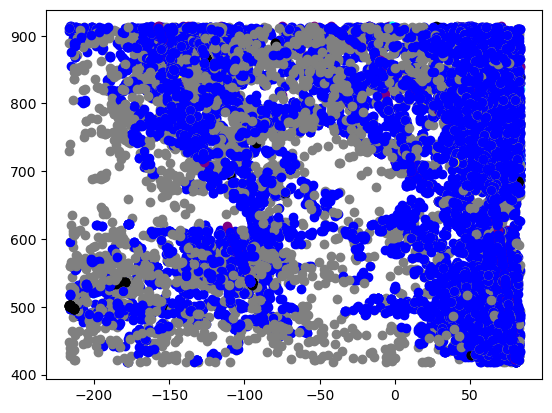

In [6]:
#For now, we'll just see the tracks of particles left in this. We'll plot the lines and also plot the scattered points.

image, ax= plt.subplots()
i=0
for points in segevent:
    
    if np.abs(points['pdg_id']) in labels:
        x_s = [points['y_end']]
        y_s = [points['z_end']]
        ax.scatter(x_s, y_s,c=pdg_color[np.abs(points['pdg_id'])])
        i+=1

plt.show()
#This takes lots of time due to the fact there's 37802 different points that correspond to different particles and are not in any particular order. 
# We can try to create the plots for trajectories that are of some interesest to us. 

For us to split the data in the kinds of particles that interest us, we can use the PDG_ID identifier. One of the main particles that are from interest to us  is the muon. Now, the "verte_id" gives us an instance of a particle track, we cannot use the "traj_id" because it doesn't allows us to correctly distinguish particle trajectories. 


In [47]:
#We grab all the muon trajectories inside the segment dataset (and antimuons)

muonsegm=segevent[np.abs(segevent['pdg_id'])==13]
#We can print the different values for the vertex_id 
unique_muon, counts=np.unique(muonsegm['vertex_id'],return_counts=True)
#This way we get the different indices and the counts of each index. We are worried for trajectories that leave clear long paths so this will be usefull. 
print(unique_muon,counts)
#For this event we have three trajectories that have more than 50. 
muonsegm

[1000000000 1000000001 1000000002 1000000006 1000000007 1000000008
 1000000009 1000000010 1000000011 1000000012 1000000013 1000000014
 1000000016 1000000018 1000000019] [115  22   4  31 114 129  18  12  14  40  16  13  70  94 162]


array([(100000, 1000000000,   190, 607.3785 ,   1,     1, 0., 602.339  ,  3.31016266e+02,  7.92118073e+01, 0,  13,  3.32761749e+02,  8.29281998e+01, 0., 0.19226788, 0.19248567, 0.19237677, 6.50036478e+00, 0., 0, 0.,  1.9886843, 1.29271736e+01, 0.,  8.10700073e+01,  331.889    , 604.85876, 0.),
       (100000, 1000000000,   191, 607.92255,   1,     1, 0., 607.3785 ,  3.30834625e+02,  7.88078537e+01, 0,  13,  3.31016266e+02,  7.92118073e+01, 0., 0.19248567, 0.19250917, 0.19249742, 7.01556206e-01, 0., 0, 0.,  1.4781111, 1.03697801e+00, 0.,  7.90098267e+01,  330.92545  , 607.6505 , 0.),
       (100000, 1000000000,   192, 609.10443,   1,     1, 0., 607.92255,  3.30436462e+02,  7.79276505e+01, 0,  13,  3.30834625e+02,  7.88078537e+01, 0., 0.19250917, 0.19256031, 0.19253474, 1.52648056e+00, 0., 0, 0.,  1.9601005, 2.99205542e+00, 0.,  7.83677521e+01,  330.63556  , 608.5135 , 0.),
       (100000, 1000000000,   193, 609.3976 ,   1,     1, 0., 609.10443,  3.30339264e+02,  7.77097321e+01, 0,  13, 

[1000000000, 1000000001, 1000000006, 1000000007, 1000000008, 1000000012, 1000000016, 1000000018, 1000000019]


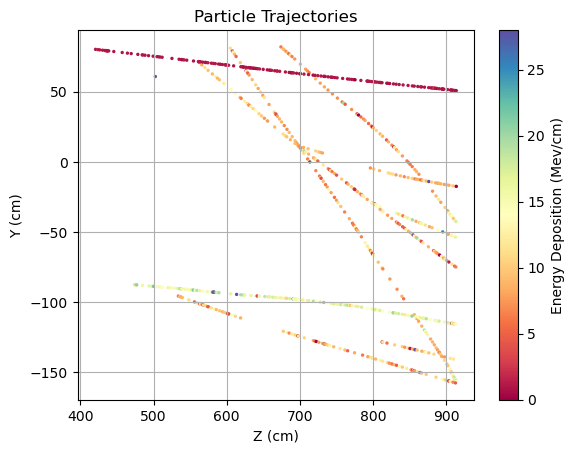

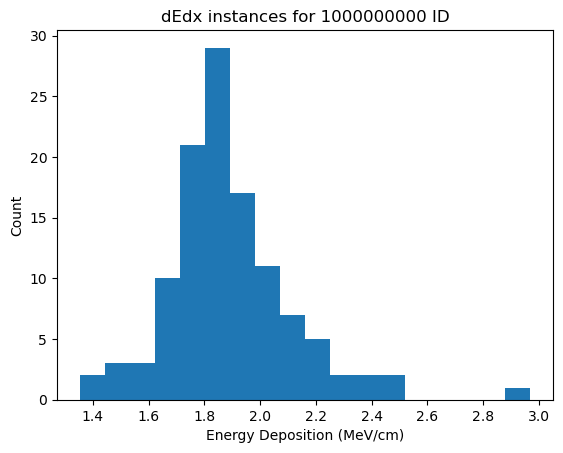

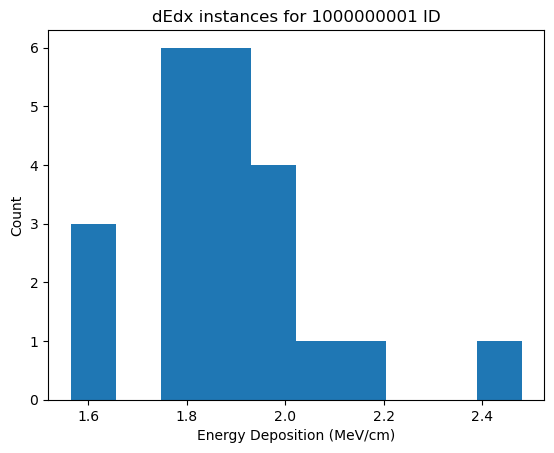

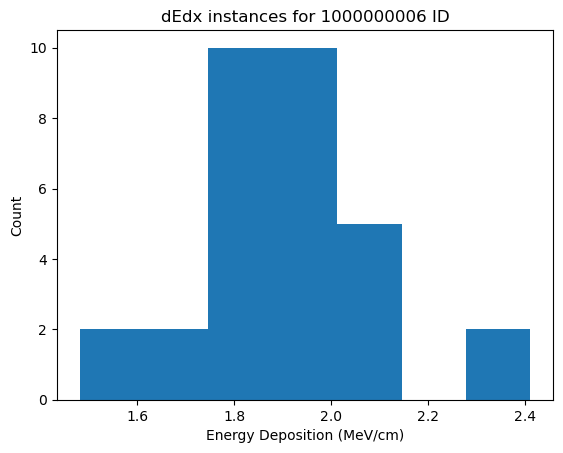

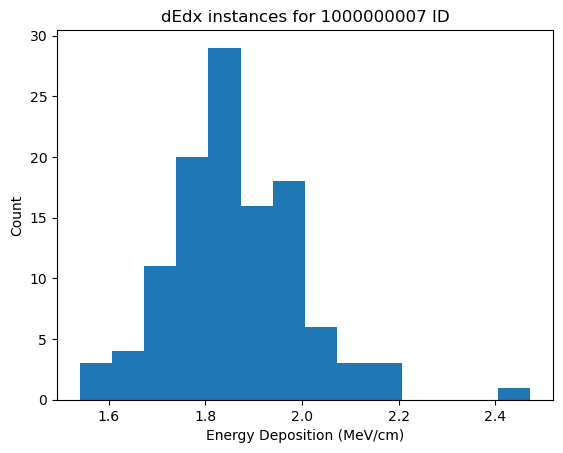

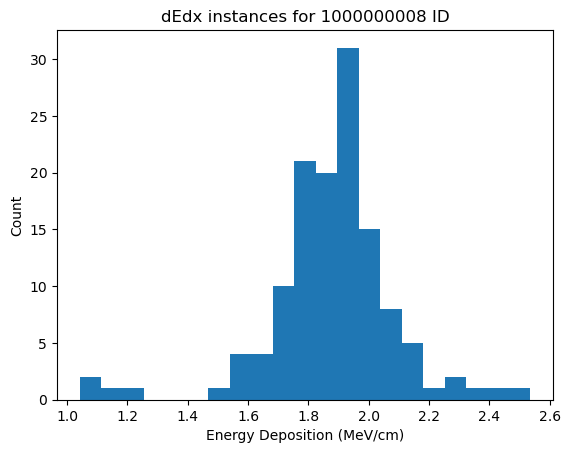

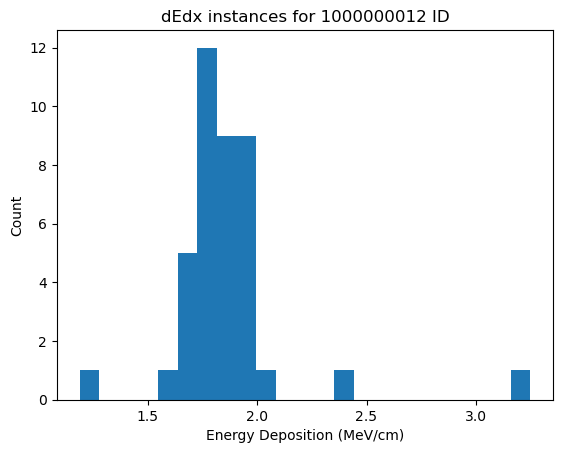

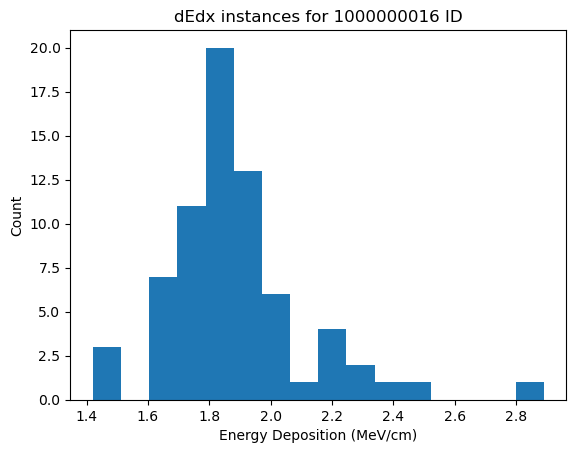

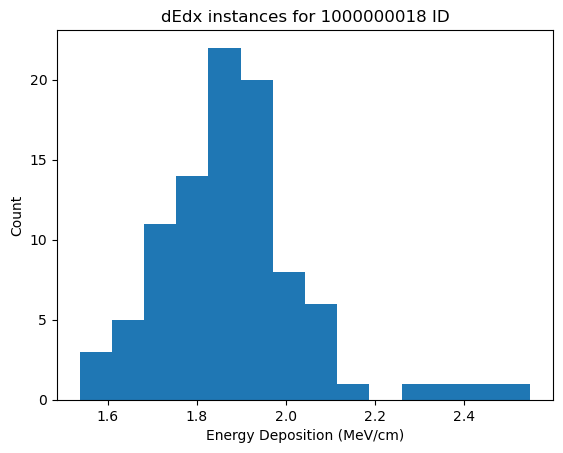

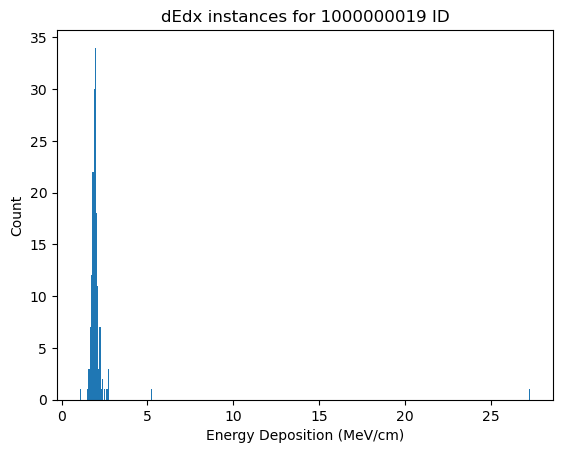

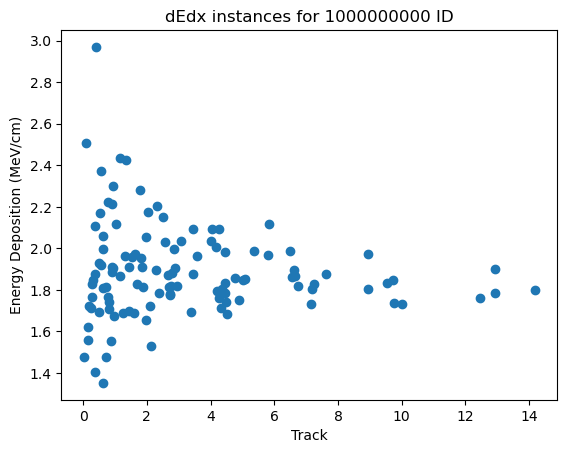

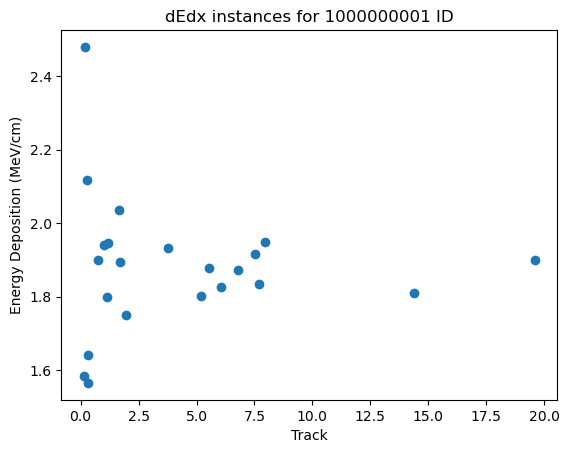

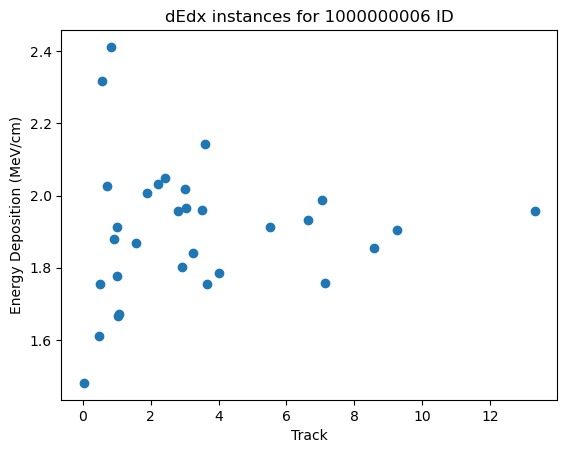

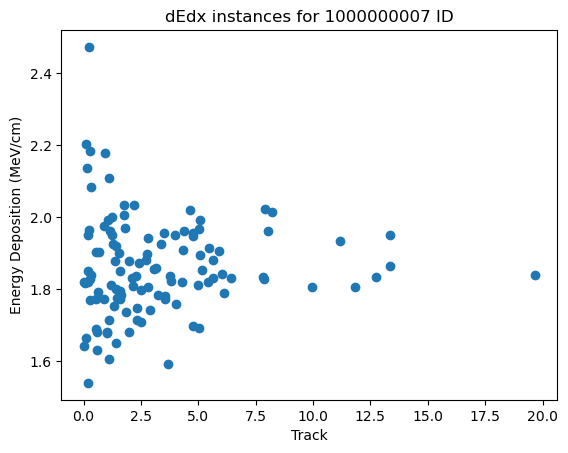

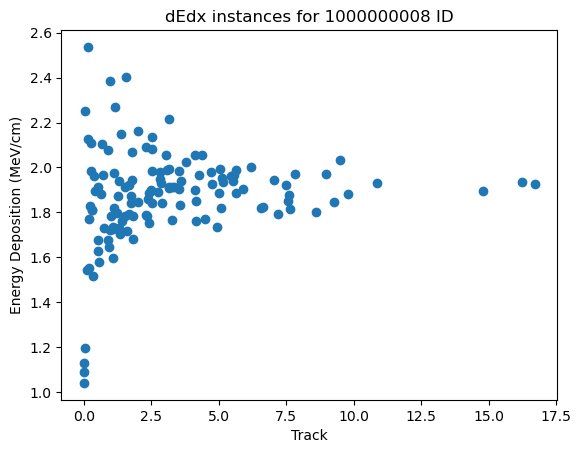

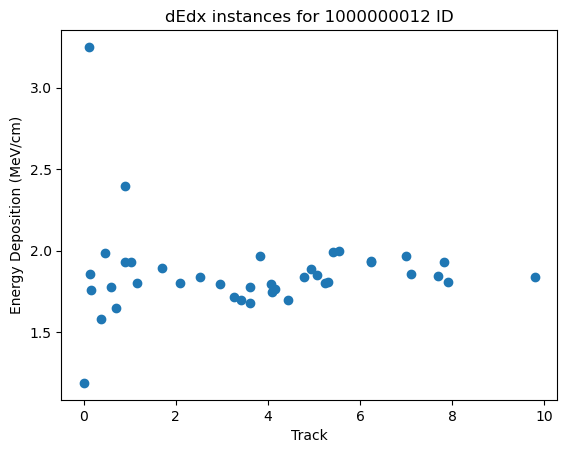

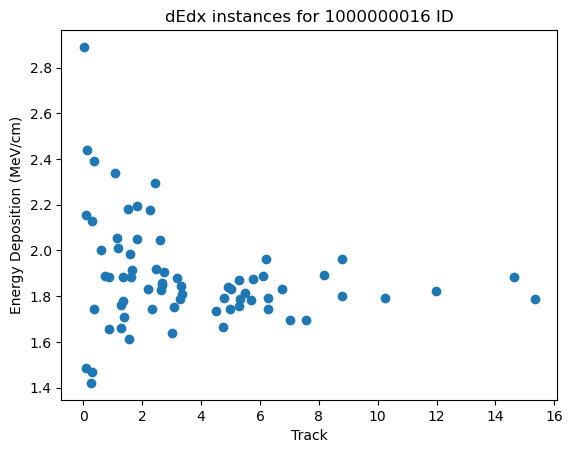

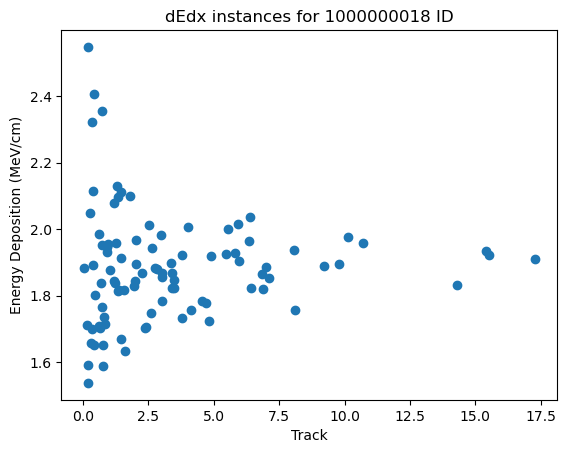

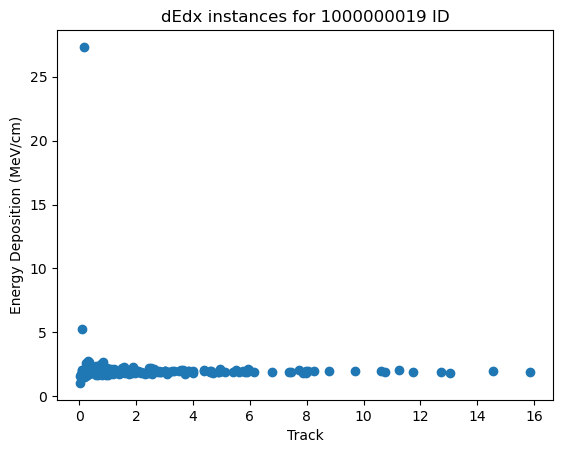

In [48]:
#Let's plot all the different trajectories that have more than 50 instance of hits.
i=0
inds=[]
funique=[]
stack=mc_stack[mc_stack['event_id']==100000]
muon_stack=stack[stack['part_pdg']==13]
for amount in counts:
    if amount> 20:
        #This should give us the list of the indexes that have more than 50 data points.
        inds.append(i)
        funique.append(unique_muon[i])
    i+=1

#Positions of the muon
# muonsegm['vertex_id'] in funique
print(funique)
dtype=muonsegm.dtype
#for points in muonsegm:
 #   if points['vertex_id'] in funique:
        
figure, bars= plt.subplots()
norm=colors.Normalize(0,np.max(muonsegm['dEdx']))
bars.set_title("Particle Trajectories")
bars.set_ylabel("Y (cm)")
bars.set_xlabel("Z (cm)")
bars.grid()
#Let's try something else 
j=0
for vertex in funique:
    onemuon=muonsegm[muonsegm['vertex_id']==vertex]
#This creates the array for just those values that we are interest in. In this for loop we can plot the different trajectories
# and also see if we can do a dEdx histogram for each particle.
    xm=onemuon['x']
    ym=onemuon['y']
    zm=onemuon['z']

    bars.scatter(onemuon['z'],onemuon['y'],c=onemuon['dEdx'],cmap='Spectral',s=2)
    
    j+=1
figure.colorbar(cm.ScalarMappable(norm=norm,cmap='Spectral'),ax=bars,label='Energy Deposition (Mev/cm)')
plt.show()
fig.savefig("MuonTrajEvent0.png")
for vertex in funique:
    onemuon=muonsegm[muonsegm['vertex_id']==vertex]
#Let's try now to do something similar but with the dEdx
    dEdx=onemuon['dEdx']
    fig2= plt.figure()
    plt.title("dEdx instances for "+str(vertex)+" ID")
    plt.xlabel("Energy Deposition (MeV/cm)")
    plt.ylabel("Count")
    plt.hist(dEdx,bins='auto')
    plt.show()
    fig2.savefig("dEdx"+str(vertex)+"ID.png")

for vertex in funique:
    onemuon=muonsegm[muonsegm['vertex_id']==vertex]
#Let's try now to do something similar but with the dEdx
    dEdx=onemuon['dEdx']
    r= onemuon['dx']
    fig3= plt.figure()
    
    plt.title("dEdx instances for "+str(vertex)+" ID")
    plt.ylabel("Energy Deposition (MeV/cm)")
    plt.xlabel("Track")
    plt.scatter(r,dEdx)
    plt.show()
    

We did this for the muon in just one event, we can try and obtain different graphs for different particles and different events. 

In the dataset "mc_hdr" there's information as to whether the particle is involved in a charged current event. We can extract this information if the answer is true we can plot the point of interaction or asign to the different trajectories that we've already seen.


In [7]:
#First grab the same event to the one we are working with.
event_mc=mc_hdr[mc_hdr['event_id']==100000]
#Now check if the event is a "charged current" event
cc_event=event_mc[event_mc['isCC']==True]
cc_event


array([(100000, 1000000000,  347.4595  ,  112.21897  , 562.7635 , 0.19054737, 18,  3,  True, False, False, False,  True, False,  3678.3328, [ 2.5228792e+01, -3.6009097e+02,  3.6605779e+03,  3.6783328e+03],  14,  1278.4069 ,  1274.0332 , 36.32304  ,  13, 2399.9258 , 2726.1804 , 1672415.5 , 0.37135363, 0.65244937),
       (100000, 1000000001, -186.64621 , -128.37065  , 812.28033, 0.45689162, 18,  4,  True, False, False,  True, False, False,  2494.7148, [-9.7106171e+00, -2.5947363e+02,  2.4811653e+03,  2.4947148e+03], -14,  2068.077  ,  2065.3762 , 11.285349 , -13,  426.63785,  598.4406 ,  176111.3 , 0.21997285, 0.1710167 ),
       (100000, 1000000002,  182.7647  ,   -1.7503616, 896.324  , 0.53219415, 18,  4,  True, False, False,  True, False, False,  2979.4346, [ 1.2703954e+01, -3.0812622e+02,  2.9634316e+03,  2.9794346e+03], -14,  2618.525  ,  2616.3926 ,  9.014041 , -13,  360.9096 ,  520.5125 ,  140677.53, 0.20771486, 0.12113363),
       (100000, 1000000006, -142.75063 ,  -29.255714 , 

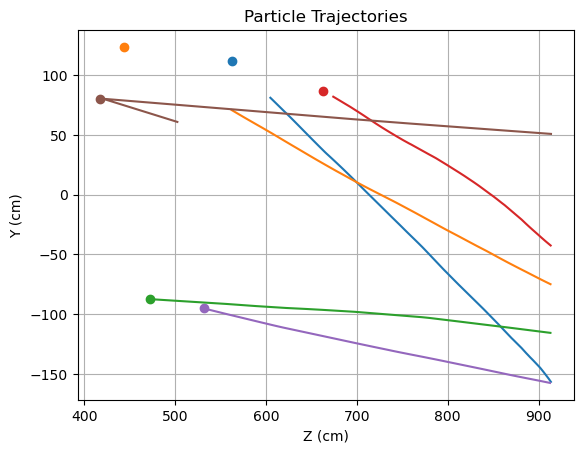

In [8]:
fig, axes = plt.subplots()

axes.set_title("Particle Trajectories")
axes.set_ylabel("Y (cm)")
axes.set_xlabel("Z (cm)")
axes.grid()
i=0
for vertex in funique:
    onemuon=muonsegm[muonsegm['vertex_id']==vertex]
    cc_vertex=cc_event[cc_event['vertex_id']==vertex]
#    if vertex==cc_event['vertex_id'][i]:
    axes.scatter(cc_vertex['z_vert'],cc_vertex['y_vert'])
#This creates the array for just those values that we are interest in. In this for loop we can plot the different trajectories
# and also see if we can do a dEdx histogram for each particle.
    xm=onemuon['x']
    ym=onemuon['y']
    zm=onemuon['z']
    
    axes.plot(zm,ym)
    i+=1
plt.show()

Let's try to graph just one of the muon tracks an asign a color gradient to it. NOTE: Made it.

What if we isolate a charged current event? And see the energy tracks it leaves behind, there's also NC events which will be even more interesting to see. 

In [90]:
mcevent=mc_hdr[mc_hdr['event_id']==100000]
protons=segevent[segevent['pdg_id']==2212]
matchproton=protons[protons['vertex_id']==1000000010]
print(matchproton[matchproton['traj_id']==4]['x'])
filtevent=cc_event[cc_event['vertex_id']==1000000010]
print(muonsegm[muonsegm['vertex_id']==1000000010]['x'])
#print(mc_stack[mc_stack['vertex_id']==1000000010])
filtevent['x_vert']

[309.42227]
[309.66882 310.09515 310.32538 310.5621  310.78467 310.83704 310.96274
 311.2542  311.55298 312.30145 313.11673 313.3478 ]


array([309.42365], dtype=float32)

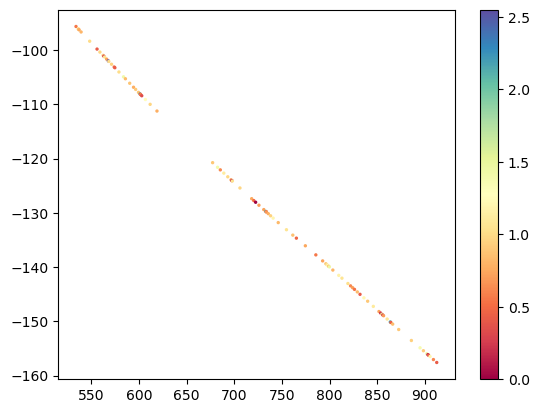

In [32]:
onemuon=muonsegm[muonsegm['vertex_id']==funique[4]]
figure, bars= plt.subplots()
norm=colors.Normalize(0,np.max(onemuon['dEdx']))
bars.scatter(onemuon['z'],onemuon['y'],c=onemuon['dEdx'],cmap='Spectral',s=2)
figure.colorbar(cm.ScalarMappable(norm=norm,cmap='Spectral'),ax=bars)

REMEMBER: The squared of the 4-momentum of a particle is constant thru all of the events.